#Data Ingestion

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("loan_data.csv")

#Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. Drop Loan_ID column
df_clean = df.drop(columns=['Loan_ID'])

# 2️. Handle missing values
# Separate categorical and numerical columns
cat_cols = df_clean.select_dtypes(include='object').columns
num_cols = df_clean.select_dtypes(exclude='object').columns

# Impute missing categorical values with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
df_clean[cat_cols] = cat_imputer.fit_transform(df_clean[cat_cols])

# Impute missing numerical values with median
num_imputer = SimpleImputer(strategy='median')
df_clean[num_cols] = num_imputer.fit_transform(df_clean[num_cols])

# 3️. Encode categorical columns
# Encode all categorical columns using LabelEncoder (since this dataset is small and manageable)
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

# 4. Split data into features (X) and target (y)
X = df_clean.drop(columns=['Loan_Status'])
y = df_clean['Loan_Status']

# 5️. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6️. Optional: Scale numerical features for logistic regression
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Show the cleaned, preprocessed data
X_train.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
154,1,0,0,0,0,-0.352802,-0.563228,-1.131588,0.280691,0.397516,2
239,1,1,1,0,0,-0.343346,-0.563228,-0.592309,0.280691,0.397516,1
448,1,1,2,0,0,-0.339471,0.050405,0.040758,0.280691,-2.515623,0
471,1,1,1,1,0,-0.445963,-0.024953,-0.393010,-2.486768,-2.515623,0
273,1,1,0,0,0,-0.451078,0.234495,0.040758,0.280691,0.397516,1


#Exploratory Data Analysis (EDA)

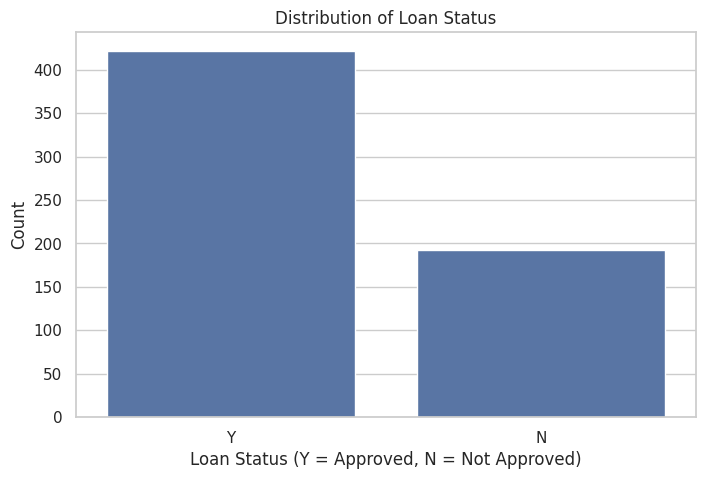

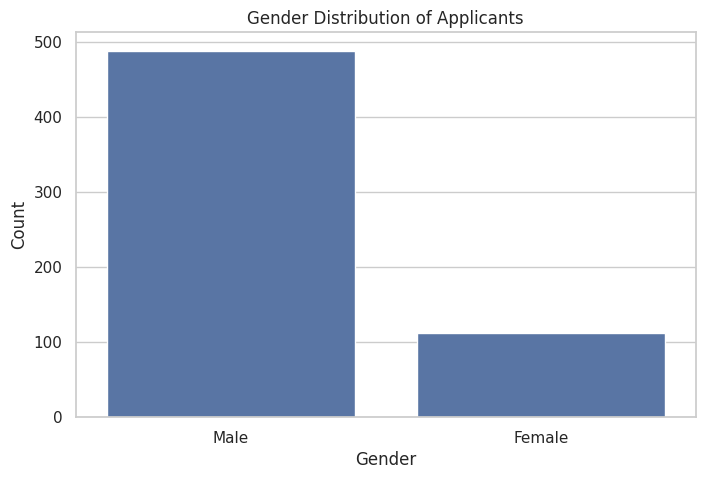

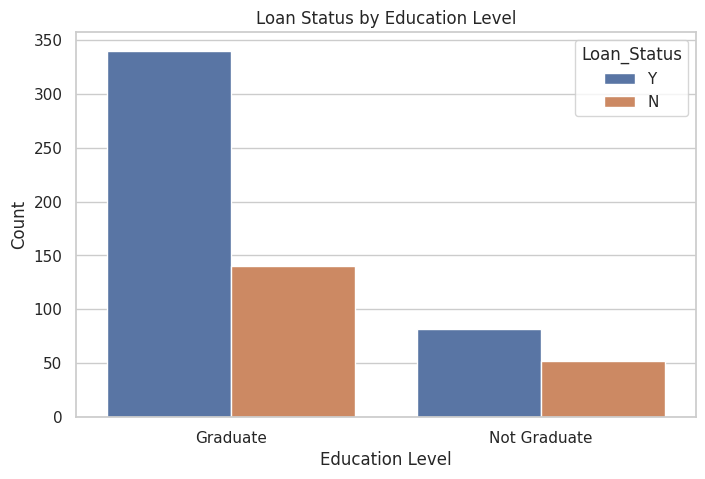

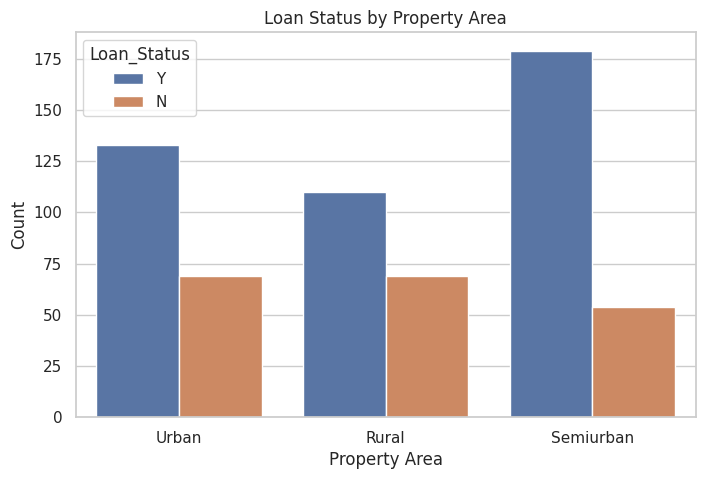

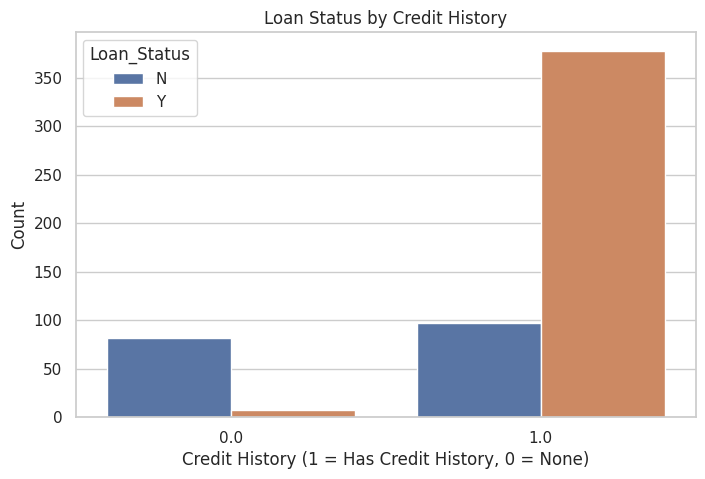

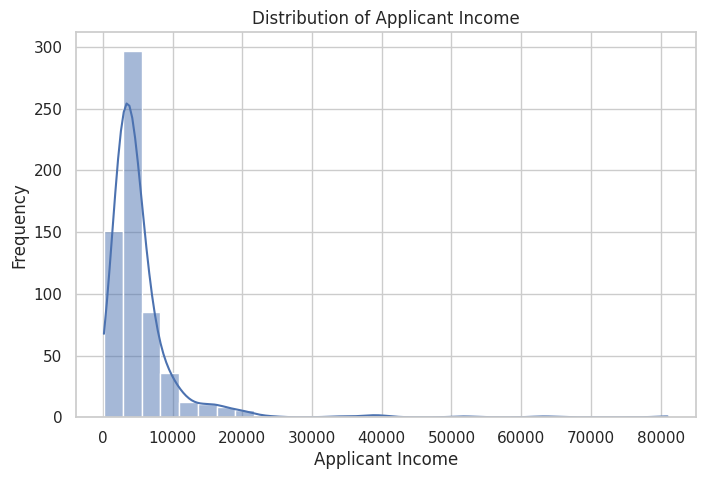

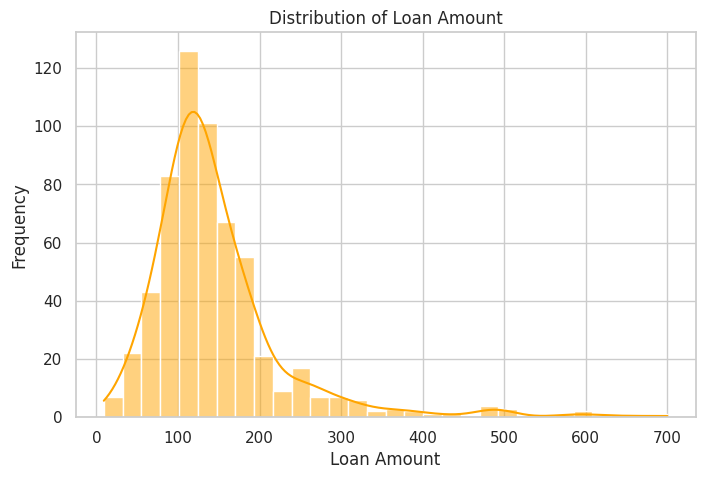

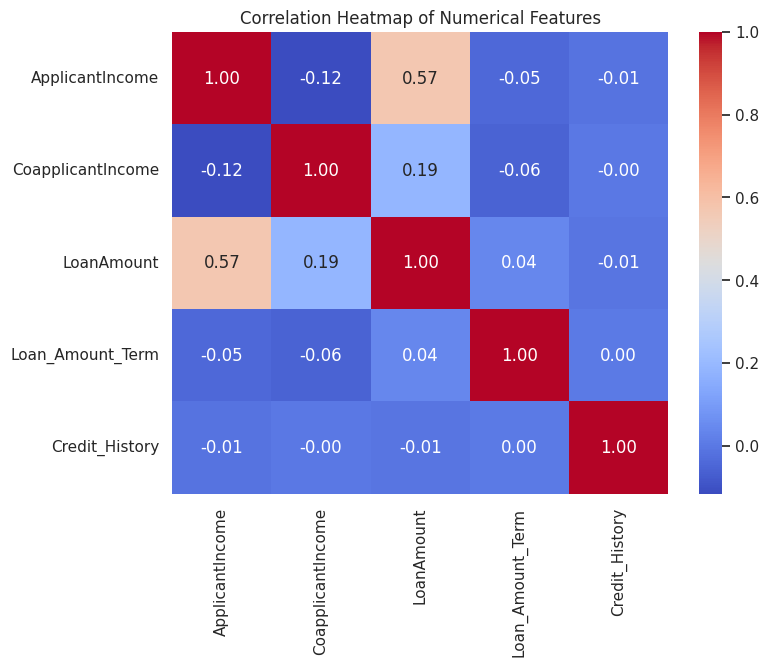

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# 1️. Target Variable Distribution
plt.figure()
sns.countplot(x='Loan_Status', data=df)
plt.title("Distribution of Loan Status")
plt.xlabel("Loan Status (Y = Approved, N = Not Approved)")
plt.ylabel("Count")
plt.show()

# 2️. Gender Distribution
plt.figure()
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution of Applicants")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# 3️. Education vs Loan Status
plt.figure()
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title("Loan Status by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

# 4️. Property Area vs Loan Status
plt.figure()
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title("Loan Status by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Count")
plt.show()

# 5️ Credit History vs Loan Status
plt.figure()
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title("Loan Status by Credit History")
plt.xlabel("Credit History (1 = Has Credit History, 0 = None)")
plt.ylabel("Count")
plt.show()

# 6️. Applicant Income Distribution
plt.figure()
sns.histplot(df['ApplicantIncome'], bins=30, kde=True)
plt.title("Distribution of Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

# 7️. Loan Amount Distribution
plt.figure()
sns.histplot(df['LoanAmount'], bins=30, kde=True, color='orange')
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

# 8️. Correlation Heatmap (Numerical Columns Only)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


###  **EDA Insights (Exploratory Data Analysis)**

#### **1️. Distribution of Loan Status**

* We see that **most applicants have Loan_Status = ‘Y’ (Approved)**.
* This indicates the dataset is **slightly imbalanced**, with more approved loans than rejected ones.
* The imbalance is not too large, but it’s good to keep in mind for evaluation metrics later (we’ll prefer F1-score over plain accuracy).

---

#### **2️. Gender Distribution of Applicants**

* **Male applicants dominate** the dataset compared to females.
* This shows that, in this dataset, **men apply for loans more frequently** than women.
* But it doesn’t mean gender decides approval — we’ll analyze that next.

---

#### **3️. Loan Status by Education Level**

* **Graduates** have a **higher loan approval rate** than **Non-graduates**.
* This suggests that **education level influences loan approval**, likely because graduates have more stable income and better repayment capability.

---

#### **4️. Loan Status by Property Area**

* Applicants from **Semiurban areas** show **the highest loan approval rate**,
  followed by Urban, and lastly Rural areas.
* This might reflect differences in **income levels or bank policies** in different locations.

---

#### **5. Loan Status by Credit History**

* A very clear pattern: **applicants with Credit_History = 1** (good history)
  have a **much higher approval rate** compared to those with Credit_History = 0.
* This is the **strongest predictor** of loan approval so far — and we’ll see that confirmed in the correlation heatmap later.

---

#### **6️. Distribution of Applicant Income**

* The majority of applicants earn **between 2,000 and 10,000**,
  but there are a few **outliers** with much higher incomes.
* These high-income outliers might slightly skew model training if not scaled —
  which we already handled with `StandardScaler` earlier.

---

#### **7️. Distribution of Loan Amount**

* Most loan amounts are around **100–200 units**,
  but again, there are some larger loans up to 700+.
* This distribution is slightly **right-skewed**, meaning more smaller loans are requested than large ones.

---

#### **8️. Correlation Heatmap**

* The **Credit_History** shows the **strongest positive correlation** with `Loan_Status`.
* **ApplicantIncome** and **LoanAmount** show very weak correlation,
  suggesting that **income or loan size alone** don’t determine approval — the credit history and categorical attributes matter more.

---

###  **Overall Insights Summary**

1. **Credit_History** is the top factor influencing loan approval.
2. **Education** and **Property_Area** also affect the likelihood of approval.
3. **ApplicantIncome** and **LoanAmount** have weak direct correlations.
4. Dataset is slightly imbalanced toward approved loans.
5. Male and graduate applicants dominate the dataset.



---

#Model Building


🔹 Logistic Regression Model Performance:
Accuracy: 0.8618

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



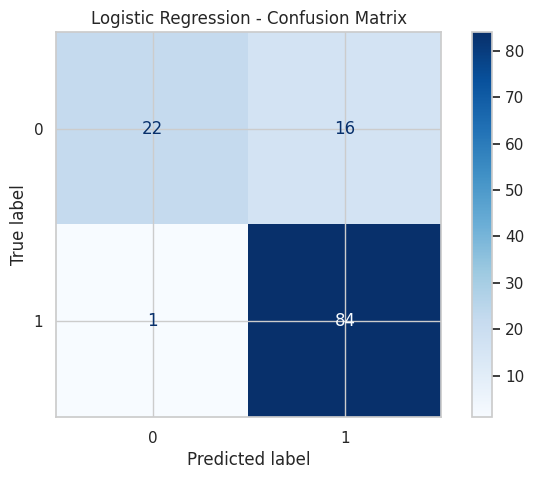


🔹 Decision Tree Model Performance:
Accuracy: 0.7642

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.61      0.61        38
           1       0.83      0.84      0.83        85

    accuracy                           0.76       123
   macro avg       0.72      0.72      0.72       123
weighted avg       0.76      0.76      0.76       123



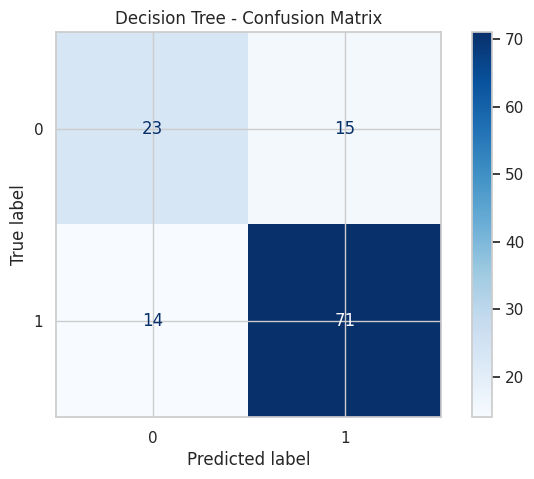


🔹 Random Forest Model Performance:
Accuracy: 0.8293

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.63      0.70        38
           1       0.85      0.92      0.88        85

    accuracy                           0.83       123
   macro avg       0.81      0.77      0.79       123
weighted avg       0.83      0.83      0.82       123



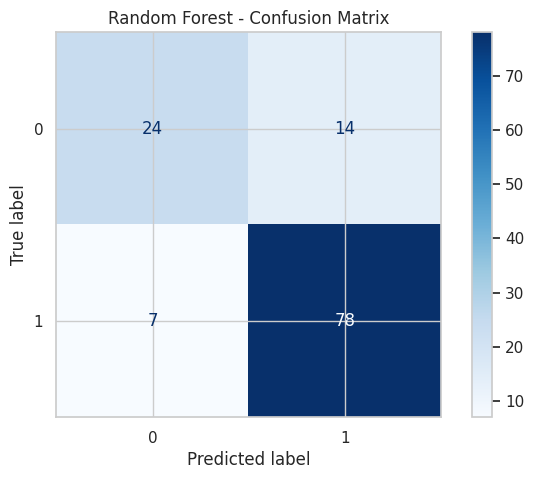

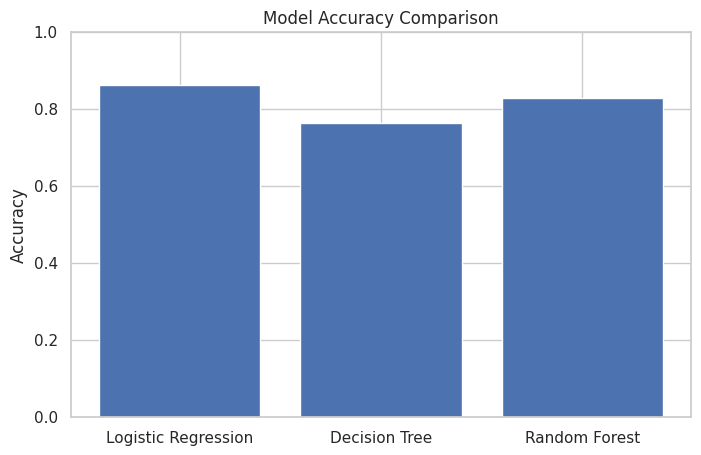

🏆 Best Performing Model: Logistic Regression with Accuracy = 0.8618


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1️. Initialize Models
log_reg = LogisticRegression(max_iter=200, random_state=42)
dec_tree = DecisionTreeClassifier(random_state=42)
rand_forest = RandomForestClassifier(random_state=42, n_estimators=100)

# 2️. Train Models
log_reg.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)

# 3️. Predictions
y_pred_log = log_reg.predict(X_test)
y_pred_tree = dec_tree.predict(X_test)
y_pred_rf = rand_forest.predict(X_test)

# 4️. Evaluation Function
def evaluate_model(name, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔹 {name} Model Performance:")
    print(f"Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Visualization
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    return acc

# 5️. Evaluate All Models
acc_log = evaluate_model("Logistic Regression", y_test, y_pred_log)
acc_tree = evaluate_model("Decision Tree", y_test, y_pred_tree)
acc_rf = evaluate_model("Random Forest", y_test, y_pred_rf)

# 6️. Compare Model Accuracies
model_results = {
    "Logistic Regression": acc_log,
    "Decision Tree": acc_tree,
    "Random Forest": acc_rf
}

plt.bar(model_results.keys(), model_results.values())
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

best_model = max(model_results, key=model_results.get)
print(f"🏆 Best Performing Model: {best_model} with Accuracy = {model_results[best_model]:.4f}")


#Model Comparison

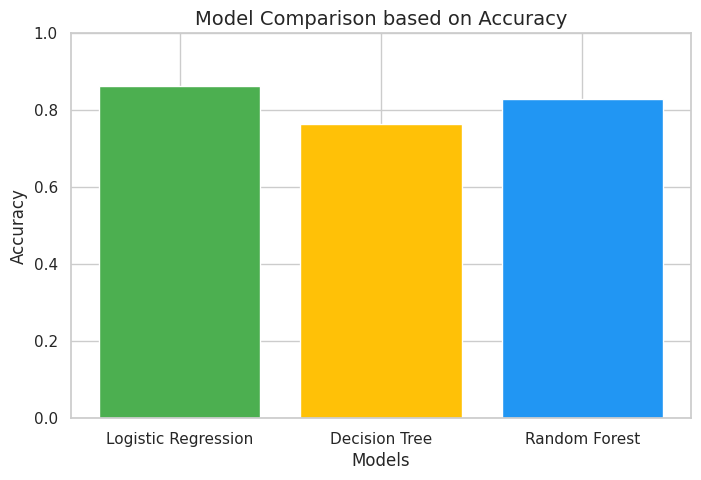

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [0.8618, 0.7642, 0.8293]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['#4CAF50', '#FFC107', '#2196F3'])
plt.title("Model Comparison based on Accuracy", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.show()


#Conclusion

1️. Logistic Regression achieved the highest accuracy (~86%) among all models.

2️. Credit History, Education, and Property Area are key predictors of Loan Status.

3️. Logistic Regression offers a good balance between interpretability and performance.

4️. Random Forest is a close second, showing good recall for approved loans.


###**Final Model Chosen:** Logistic Regression


**Conclusion:**

The Logistic Regression model effectively predicts loan approval with 86% accuracy, making it a reliable tool for automating loan eligibility screening in financial institutions.